## Beräkningarna till rapporten i statistiska metoder

In [119]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### Deskriptiv dataanalys

In [120]:
df = pd.read_csv(r'../Statistiska-Metoder-Sara-Gunnars/Dataset-20230206/iris.csv') #läser in datan i csv filen Iris
df.head() #printar ut de första 5 raderna 

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [121]:
df.describe() #tar fram deskriptiva mått så som medelvärde, medianvärde, standardavvikelse och dylikt för datasetet

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
df.info() # Överblick över columninnehållen. Totalt 5 kolumner med 150 värden i varje column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [123]:
df.columns = df.columns.str.replace(" ", "") #tog bort mellanslag i kolumn namn då 'class kolumnen' innehöll ett mellanslag 

In [124]:
df["class"].value_counts() # setet innehåller data för  tre olika arter av iris

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [125]:
# data delas in i separata variabler baserat på art
iris_setosa = df.loc[df['class'] == 'Iris-setosa']
iris_versicolor = df.loc[df['class'] == 'Iris-versicolor']
iris_virginica = df.loc[df['class'] == 'Iris-virginica']

### Deskriptiv analys per art per art

In [126]:
# data delas in i separata variabler baserat på art
iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [127]:
iris_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [128]:
iris_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [142]:
# species petal length mean

versicolor_petal_length_mean= iris_versicolor['petal_length'].mean()
virginica_petal_length_mean = iris_virginica['petal_length'].mean()

# species petal length standardavvikelse 
versicolor_petal_length_std= iris_versicolor['petal_length'].std()
virginica_petal_length_std = iris_virginica['petal_length'].std()

### Distribution av Setos petal length
- Överblick av distributionen av length datan för arten

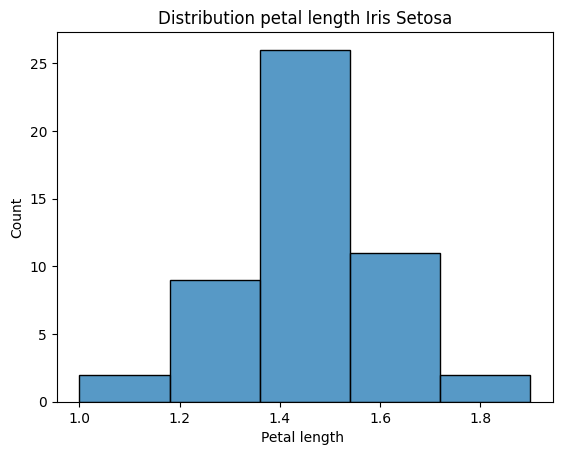

In [130]:
# plots data from df iris setosa, x value set to coulmn petal_length)
fig = sns.histplot(data = iris_setosa, x = 'petal_length', bins= 5) 
#Set labels of x ax and titel 
fig.set(xlabel = "Petal length ", title= 'Distribution petal length Iris Setosa')
# saves plot 
plt.savefig('../Statistiska-Metoder-Sara-Gunnars/Plottar/setos_petal_length_dist')

### Beräknat Iris Setosa petal length medelvärde och standardavvikelse

In [144]:
# mean value of sample
setos_petal_length_mean = iris_setosa['petal_length'].mean()
# Standard deviation of sample
setos_petal_length_std = iris_setosa['petal_length'].std()

print(f"Petal length mean: {setos_petal_length_mean} \nPetal standard deviation: {setos_petal_length_std}")

Petal length mean: 1.464 
Petal standard deviation: 0.17351115943644546


### Konfidensintervall vid 95% av ovan nämnda stickprov

In [156]:
# använder scipy.stats flr att beräkna konfidensintervall vid 95% tillförlitlighet då sigma är standardavvikelse är känt
konfidensintervall_setos_petal_length = st.norm.interval(alpha = 0.95, loc = setos_petal_length_mean, scale = setos_petal_length_std)
print("Konfidensintervall 95%")
print(f"Mindre än 5% chans att populationens medelvärde understiger {konfidensintervall_setos_petal_length[0]}")
print(f"Mindre än 5% chans att populationens medelvärde överstiger {konfidensintervall_setos_petal_length[1]}")
print("")
print(f"Vårt sample medelvärde är: {setos_petal_length_mean}, vilket ligger inom vår konfidensintervall")

Konfidensintervall 95%
Mindre än 5% chans att populationens medelvärde understiger 1.1239243765887799
Mindre än 5% chans att populationens medelvärde överstiger 1.80407562341122

Vårt sample medelvärde är: 1.464, vilket ligger inom vår konfidensintervall


/var/folders/_j/wrygfb3x2znc30ht6mt37s0h0000gn/T/ipykernel_13306/2590701819.py:2: DeprecationWarning:

Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.

